<a href="https://colab.research.google.com/github/norflin321/ml/blob/main/txt2img_diffusers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install transformers diffusers accelerate &> /dev/null

import torch
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt
import datetime

# model_id = "dreamlike-art/dreamlike-diffusion-1.0"
# model_id = "prompthero/openjourney"
model_id = "XpucT/Deliberate"
# model_id = "johnslegers/epic-diffusion"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
pipe = pipe.to(device)

unet/diffusion_pytorch_model.safetensors not found


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Token indices sequence length is longer than the specified maximum sequence length for this model (243 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['firefly, lowkey, dark shot, depth, detailed shade and lighting, fairy wings are in the shoulder blade position, ( effect : glowing firefly neon lights ) [[( masterpiece, best quality, high quality : 1. 4 ), very pretty look face, and very pretty eyes, cute images, lovely images, ( whole full body ), solo, beautiful, front, lovely, adorable, pale skin, ( 1 8 to 2 2 years old german girl, ( full body : 1. 4 ), glowing eyes, look beautiful german girl and blue eyes or green eyes with platinum blonde hair color ), nordic german young girl, ( massive chest : 1. 4 ), ( wide hips : 1. 4 ), professional drawings, extremely detailed cg unity 5 6 6 9 k 8 0 p ultra qd _ oled wallpaper clear png image )]]']


  0%|          | 0/50 [00:00<?, ?it/s]

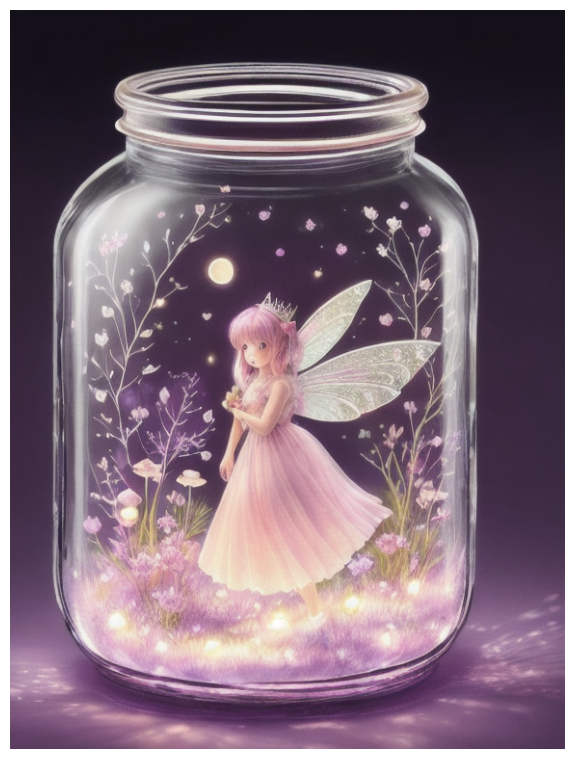

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['firefly, lowkey, dark shot, depth, detailed shade and lighting, fairy wings are in the shoulder blade position, ( effect : glowing firefly neon lights ) [[( masterpiece, best quality, high quality : 1. 4 ), very pretty look face, and very pretty eyes, cute images, lovely images, ( whole full body ), solo, beautiful, front, lovely, adorable, pale skin, ( 1 8 to 2 2 years old german girl, ( full body : 1. 4 ), glowing eyes, look beautiful german girl and blue eyes or green eyes with platinum blonde hair color ), nordic german young girl, ( massive chest : 1. 4 ), ( wide hips : 1. 4 ), professional drawings, extremely detailed cg unity 5 6 6 9 k 8 0 p ultra qd _ oled wallpaper clear png image )]]']


seed: 7057


  0%|          | 0/50 [00:00<?, ?it/s]

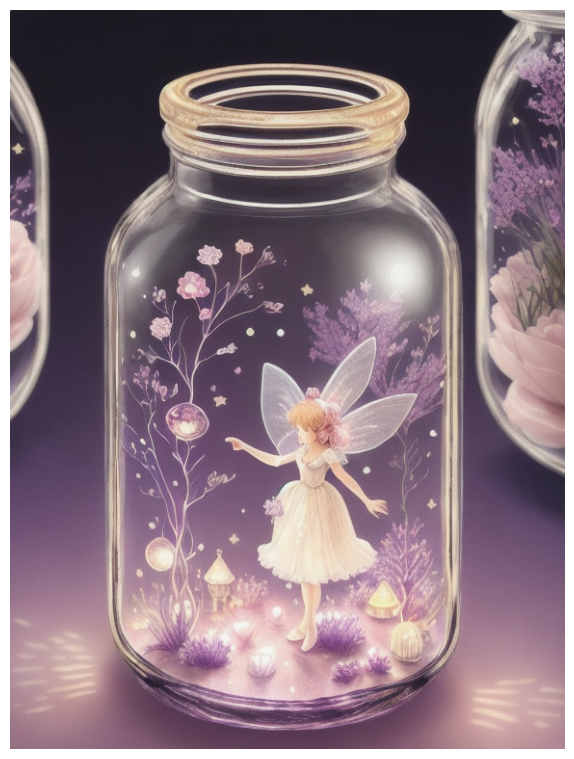

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['firefly, lowkey, dark shot, depth, detailed shade and lighting, fairy wings are in the shoulder blade position, ( effect : glowing firefly neon lights ) [[( masterpiece, best quality, high quality : 1. 4 ), very pretty look face, and very pretty eyes, cute images, lovely images, ( whole full body ), solo, beautiful, front, lovely, adorable, pale skin, ( 1 8 to 2 2 years old german girl, ( full body : 1. 4 ), glowing eyes, look beautiful german girl and blue eyes or green eyes with platinum blonde hair color ), nordic german young girl, ( massive chest : 1. 4 ), ( wide hips : 1. 4 ), professional drawings, extremely detailed cg unity 5 6 6 9 k 8 0 p ultra qd _ oled wallpaper clear png image )]]']


seed: 1241


  0%|          | 0/50 [00:00<?, ?it/s]

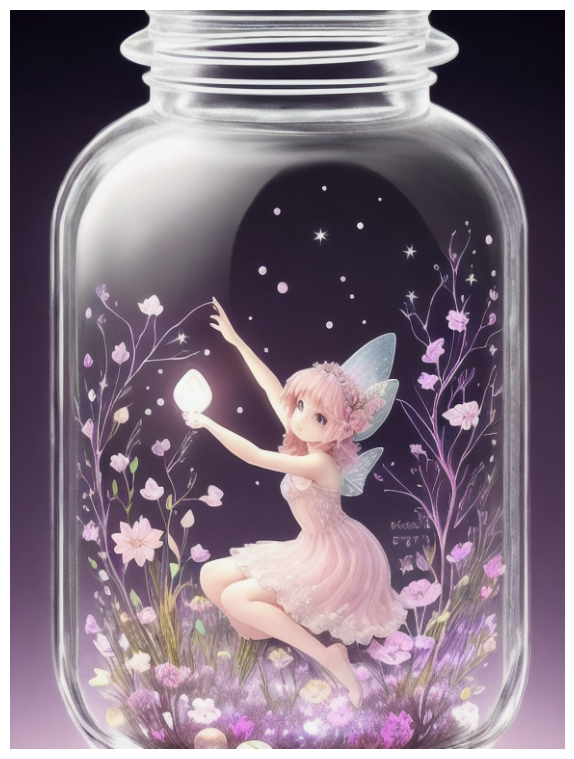

seed: 98374


In [2]:
# hyperparameters
width, height = 576, 768 # The width and height in pixels of the generated image
steps = 50 # The number of denoising steps. More denoising steps usually lead to a higher quality image at the expense of slower inference.
guidance = 7.5 # Higher guidance scale encourages to generate images that are closely linked to the text prompt, usually at the expense of lower image quality.
images_to_generate = 3 # The number of images to generate per prompt
seed = None # set seed of previously generated image to reproduce it

# prompts
prompt = "A fairy trapped in an empty jar of jam, (photo realistic), extremely detailed and delicate illustration, beautiful and aesthetic, official art, single girl, ((glowing light purple and light pink theme, white theme, fairytale theme)), dream-like, (big jar is on the table, tiny fairy is in the jar), bioluminescent, glowing moon flowers, firefly, lowkey, dark shot, depth, detailed shade and lighting, Fairy wings are in the shoulder blade position, (effect: glowing firefly neon lights) [[(Masterpiece, Best Quality, High Quality:1. 4), very pretty look face, and very pretty eyes, cute images, lovely images, (whole full body), solo, beautiful, front, lovely, adorable, pale skin, (18to 22 years old German girl, (full body:1. 4), glowing eyes, look beautiful German girl and blue eyes or green eyes with platinum blonde hair color), Nordic German young girl, (massive chest:1. 4), (wide hips:1. 4), professional drawings, extremely detailed CG unity 5669k80p Ultra QD_OLED wallpaper clear png image)]]"
negative_prompt = "easynegative, (low quality, worst quality:1.4), bad anatomy, bad composition, out of frame, duplicate, watermark, signature, text, deformed, cripple, ugly, additional arms, additional legs, additional head, two heads, multiple people, group of people"

for i in range(images_to_generate):
    current_seed = seed or torch.randint(0, int(1e5), size=(1, 1))[0].item()
    generator = torch.Generator().manual_seed(int(current_seed))
    img = pipe(prompt=prompt, negative_prompt=negative_prompt, width=width, height=height, num_inference_steps=steps, guidance_scale=guidance, generator=generator).images[0]
    time_now = datetime.datetime.now().strftime("%y.%m.%d_%H:%M:%S")
    img.save(f"./{time_now}_{current_seed}.jpg")
    plt.figure(figsize=(width/80, height/80))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("seed:", current_seed)